In [1]:
import sys
import pandas as pd
import datetime as datetime
import numpy as np
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import OneHotEncoder
import matplotlib
import matplotlib.pyplot as plt
#import psycopg2
from scipy.stats import ks_2samp
import scipy.stats as scats
import visuals as vs
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from heapq import nlargest
plt.style.use('ggplot') 
%matplotlib inline

In [7]:
chart_data = pd.DataFrame.from_csv('CHART_EVENTS_FIRST24_PROCESSED.csv')
lab_data = pd.DataFrame.from_csv('LAB_EVENTS_FIRST24_PROCESSED.csv')
chart_data.head()

,icustay_id,subject_id,BP_Dia_max,BP_Dia_mean,BP_Dia_med,BP_Dia_min,BP_Dia_skew,BP_Dia_std,BP_Mean_max,BP_Mean_mean,...,pH2_med,pH2_min,pH2_skew,pH2_std,pH_max,pH_mean,pH_med,pH_min,pH_skew,pH_std
0,200001,55973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200003,27513,81.0,42.708333,60.5,0.0,-0.623249,31.452489,179.0,87.411765,...,7.38,7.36,1.220037,0.038987,7.46,7.398,7.38,7.36,1.220037,0.038987
2,200006,10950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200007,20707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200009,29904,84.0,62.645161,57.0,49.0,0.868910,10.931753,101.0,74.741935,...,7.39,7.29,0.360059,0.071063,7.50,7.380,7.39,7.29,0.360059,0.071063


In [57]:
donkey = [x for x in chart_data.columns if 'time' in x]
for donk in donkey:
    chart_data[donk] = pd.to_datetime(chart_data[donk])

for index, row in chart_data.iterrows():
    staylen = relativedelta(row['outtime'], row['intime']).hours
    chart_data.set_value(index, 'stay_duration', staylen)


icustay_id                       int64
subject_id                       int64
BP_Dia_max                     float64
BP_Dia_mean                    float64
BP_Dia_med                     float64
BP_Dia_min                     float64
BP_Dia_skew                    float64
BP_Dia_std                     float64
BP_Mean_max                    float64
BP_Mean_mean                   float64
BP_Mean_med                    float64
BP_Mean_min                    float64
BP_Mean_skew                   float64
BP_Mean_std                    float64
BP_Sys_max                     float64
BP_Sys_mean                    float64
BP_Sys_med                     float64
BP_Sys_min                     float64
BP_Sys_skew                    float64
BP_Sys_std                     float64
Cap_refill                      object
GCS_Eye                         object
GCS_Motor                       object
GCS_Verbal                      object
GCS_total                      float64
HR_max                   

In [ ]:
chart_data2 = chart_data.set_index(['icustay_id'], inplace = False)
lab_data2 = lab_data.set_index(['icustay_id'], inplace = False)

In [284]:
display(lab_data2.head())
display(chart_data2.head())

,Lactate_max_df,Lactate_mean_df,Lactate_med_df,Lactate_min_df,Lactate_skew_df,Lactate_std_df,O2sat_max_df,O2sat_mean_df,O2sat_med_df,O2sat_min_df,O2sat_skew_df,O2sat_std_df,charttime,flag,pH_max_df,pH_mean_df,pH_med_df,pH_min_df,pH_skew_df,pH_std_df
icustay_id,,,,,,,,,,,,,,,,,,,,
205291,0.8,0.800000,0.8,0.8,NaN,NaN,99.0,92.875000,98.0,58.0,-2.816814,14.106103,2159-02-01 07:33:00,abnormal,7.46,7.325833,7.325,7.26,1.114474,0.057597
267509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2160-12-16 08:50:00,NaN,5.00,5.000000,5.000,5.00,NaN,0.000000
204824,3.7,2.866667,2.7,2.2,0.93522,0.763763,NaN,NaN,NaN,NaN,NaN,NaN,2122-12-23 00:51:00,abnormal,6.50,6.500000,6.500,6.50,NaN,NaN
210799,4.5,4.500000,4.5,4.5,NaN,NaN,95.0,74.142857,64.0,56.0,0.330597,17.544501,2182-09-05 16:27:00,NaN,7.56,7.402000,7.380,7.31,0.741323,0.072329
206949,2.5,2.500000,2.5,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2167-01-27 16:32:00,abnormal,7.41,6.603333,7.400,5.00,-1.731950,1.388536


,subject_id,BP_Dia_max,BP_Dia_mean,BP_Dia_med,BP_Dia_min,BP_Dia_skew,BP_Dia_std,BP_Mean_max,BP_Mean_mean,BP_Mean_med,...,pH2_min,pH2_skew,pH2_std,pH_max,pH_mean,pH_med,pH_min,pH_skew,pH_std,stay_duration
icustay_id,,,,,,,,,,,,,,,,,,,,,
200001,55973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
200003,27513,81.0,42.708333,60.5,0.0,-0.623249,31.452489,179.0,87.411765,80.0,...,7.36,1.220037,0.038987,7.46,7.398,7.38,7.36,1.220037,0.038987,21.0
200006,10950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
200007,20707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
200009,29904,84.0,62.645161,57.0,49.0,0.868910,10.931753,101.0,74.741935,69.0,...,7.29,0.360059,0.071063,7.50,7.380,7.39,7.29,0.360059,0.071063,3.0


In [277]:
lab_data2.drop(['hospital_expire_flag', 'subject_id', 'gender', 'intime', 'outtime'], 
               axis = 1, inplace = True)

all_data = chart_data2.merge(lab_data2, left_index = True, right_index = True, how='left', sort = True, 
                            suffixes = ('chart', 'lab'))
all_data.dtypes

ValueError: labels ['hospital_expire_flag' 'subject_id' 'gender' 'intime' 'outtime'] not contained in axis

In [ ]:
all_data['icustay_id'] = all_data.index
all_data.set_index(np.arange(all_data.shape[0]), inplace = True)

In [288]:
cols = list(all_data.columns)
cols.sort()
cols.insert(0, cols.pop(cols.index('icustay_id')))
cols.insert(1, cols.pop(cols.index('subject_id')))
all_data = all_data[cols]


all_data.columns

Index([u'icustay_id', u'subject_id', u'BP_Dia_max', u'BP_Dia_mean',
       u'BP_Dia_med', u'BP_Dia_min', u'BP_Dia_skew', u'BP_Dia_std',
       u'BP_Mean_max', u'BP_Mean_mean', u'BP_Mean_med', u'BP_Mean_min',
       u'BP_Mean_skew', u'BP_Mean_std', u'BP_Sys_max', u'BP_Sys_mean',
       u'BP_Sys_med', u'BP_Sys_min', u'BP_Sys_skew', u'BP_Sys_std',
       u'Cap_refill', u'GCS_Eye', u'GCS_Motor', u'GCS_Verbal', u'GCS_total',
       u'HR_max', u'HR_mean', u'HR_med', u'HR_min', u'HR_skew', u'HR_std',
       u'Height', u'Lactate_max_df', u'Lactate_mean_df', u'Lactate_med_df',
       u'Lactate_min_df', u'Lactate_skew_df', u'Lactate_std_df',
       u'O2_Fraction_max', u'O2_Fraction_mean', u'O2_Fraction_med',
       u'O2_Fraction_min', u'O2_Fraction_skew', u'O2_Fraction_std',
       u'O2sat_max_df', u'O2sat_mean_df', u'O2sat_med_df', u'O2sat_min_df',
       u'O2sat_skew_df', u'O2sat_std_df', u'RR_max', u'RR_mean', u'RR_med',
       u'RR_min', u'RR_skew', u'RR_std', u'TempC_Calc_max', u'TempC_Calc

## Isolate continuous (float64) and categorical variables for feature selection process. 
Feature selection tools require features to be of the same type. Data will be separated, feature correlations will be calculated. 
### height, weight, gcs_total are not being included in these groupings and should be considered separately

In [289]:
monkey = list(all_data.columns[all_data.dtypes == 'float64'])
monkey.insert(0,'icustay_id')
monkey.insert(1,'hospital_expire_flag')
monkey.pop(monkey.index('Height'))
monkey.pop(monkey.index('Weight'))
cont_data = all_data[monkey]

monkey = list(all_data.columns[all_data.dtypes == 'object'])
monkey.insert(0,'icustay_id')
monkey.insert(1,'hospital_expire_flag')
cat_data = all_data[monkey]


In [290]:
cont_data.dtypes

icustay_id                int64
hospital_expire_flag      int64
BP_Dia_max              float64
BP_Dia_mean             float64
BP_Dia_med              float64
BP_Dia_min              float64
BP_Dia_skew             float64
BP_Dia_std              float64
BP_Mean_max             float64
BP_Mean_mean            float64
BP_Mean_med             float64
BP_Mean_min             float64
BP_Mean_skew            float64
BP_Mean_std             float64
BP_Sys_max              float64
BP_Sys_mean             float64
BP_Sys_med              float64
BP_Sys_min              float64
BP_Sys_skew             float64
BP_Sys_std              float64
GCS_total               float64
HR_max                  float64
HR_mean                 float64
HR_med                  float64
HR_min                  float64
HR_skew                 float64
HR_std                  float64
Lactate_max_df          float64
Lactate_mean_df         float64
Lactate_med_df          float64
                         ...   
TempC_Ca

## This filtering on feature selection could be done far earlier in the process. Could do it in smaller blocks where the variables are aligned with the subject ID
Variables are not present for all subject_id's or ICU stays. In order to select features, we need to drop_na. So we need to find blocks of features that are present for the same ICU stays etc. In retrospect this could be done earlier in the process before all the data is merged. 

## CREATING CONTINUOUS / FLOAT64 DATA BLOCKS FOR FEATURE SELECTION
### GCS_total, stay_duration are not included in these blocks and need to be considered separately 

In [291]:
cont_data.columns

Index([u'icustay_id', u'hospital_expire_flag', u'BP_Dia_max', u'BP_Dia_mean',
       u'BP_Dia_med', u'BP_Dia_min', u'BP_Dia_skew', u'BP_Dia_std',
       u'BP_Mean_max', u'BP_Mean_mean', u'BP_Mean_med', u'BP_Mean_min',
       u'BP_Mean_skew', u'BP_Mean_std', u'BP_Sys_max', u'BP_Sys_mean',
       u'BP_Sys_med', u'BP_Sys_min', u'BP_Sys_skew', u'BP_Sys_std',
       u'GCS_total', u'HR_max', u'HR_mean', u'HR_med', u'HR_min', u'HR_skew',
       u'HR_std', u'Lactate_max_df', u'Lactate_mean_df', u'Lactate_med_df',
       u'Lactate_min_df', u'Lactate_skew_df', u'Lactate_std_df',
       u'O2_Fraction_max', u'O2_Fraction_mean', u'O2_Fraction_med',
       u'O2_Fraction_min', u'O2_Fraction_skew', u'O2_Fraction_std',
       u'O2sat_max_df', u'O2sat_mean_df', u'O2sat_med_df', u'O2sat_min_df',
       u'O2sat_skew_df', u'O2sat_std_df', u'RR_max', u'RR_mean', u'RR_med',
       u'RR_min', u'RR_skew', u'RR_std', u'TempC_Calc_max', u'TempC_Calc_mean',
       u'TempC_Calc_med', u'TempC_Calc_min', u'TempC_Cal

In [294]:
[x for x in lab_data.columns if '_df' in x]

['Lactate_max_df',
 'Lactate_mean_df',
 'Lactate_med_df',
 'Lactate_min_df',
 'Lactate_skew_df',
 'Lactate_std_df',
 'O2sat_max_df',
 'O2sat_mean_df',
 'O2sat_med_df',
 'O2sat_min_df',
 'O2sat_skew_df',
 'O2sat_std_df',
 'pH_max_df',
 'pH_mean_df',
 'pH_med_df',
 'pH_min_df',
 'pH_skew_df',
 'pH_std_df']

In [295]:
cols = ['icustay_id', 'hospital_expire_flag', 'GCS_total']
cont_data_GCST = cont_data[cols].dropna()
cont_data_GCST.reset_index(drop = True, inplace = True)
print "GCS_total  = {}".format(cont_data_GCST.shape[0])

cols = ['icustay_id', 'hospital_expire_flag', 'stay_duration']
cont_data_Stay = cont_data[cols].dropna()
cont_data_Stay.reset_index(drop = True, inplace = True)
print "Stay_total  = {}".format(cont_data_Stay.shape[0])

cols = [x for x in cont_data.columns if 'Lactate_' in x]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cont_data_Lac = cont_data[cols].dropna()
cont_data_Lac.reset_index(drop = True, inplace = True)
print "Lactate  = {}".format(cont_data_Lac.shape[0])

cols = [x for x in cont_data.columns if 'O2sat_' in x]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cont_data_O2sat = cont_data[cols].dropna()
cont_data_O2sat.reset_index(drop = True, inplace = True)
print "O2sat  = {}".format(cont_data_O2sat.shape[0])

cols = [x for x in cont_data.columns if (('pH_' in x) | ('_df' in x))]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cont_data_labpH = cont_data[cols].dropna()
cont_data_labpH.reset_index(drop = True, inplace = True)
print "labpH  = {}".format(cont_data_labpH.shape[0])


cols = [x for x in cont_data.columns if 'BP_' in x]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cont_data_BP = cont_data[cols].dropna()
cont_data_BP.reset_index(drop = True, inplace = True)
print "BP  = {}".format(cont_data_BP.shape[0])

cols = [x for x in cont_data.columns if 'HR_' in x]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cont_data_HR = cont_data[cols].dropna()
cont_data_HR.reset_index(drop = True, inplace = True)
print "HR  = {}".format(cont_data_HR.shape[0])


cols = [x for x in cont_data.columns if 'O2_' in x]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cont_data_O2 = cont_data[cols].dropna()
cont_data_O2.reset_index(drop = True, inplace = True)
print "O2  = {}".format(cont_data_O2.shape[0])

cols = [x for x in cont_data.columns if 'RR_' in x]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cont_data_RR = cont_data[cols].dropna()
cont_data_RR.reset_index(drop = True, inplace = True)
print "RR  = {}".format(cont_data_RR.shape[0])


cols = [x for x in cont_data.columns if 'TempC_Calc' in x]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cont_data_TCalc = cont_data[cols].dropna()
cont_data_TCalc.reset_index(drop = True, inplace = True)
print "TCalc  = {}".format(cont_data_TCalc.shape[0])

cols = [x for x in cont_data.columns if (('TempC_' in x) & ('TempC_C' not in x))]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cont_data_TC = cont_data[cols].dropna()
cont_data_TC.reset_index(drop = True, inplace = True)
print "TC  = {}".format(cont_data_TC.shape[0])

cols = [x for x in cont_data.columns if (('pH_' in x) | ('pH2_' in x))]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cont_data_pH = cont_data[cols].dropna()
cont_data_pH.reset_index(drop = True, inplace = True)
print "pH  = {}".format(cont_data_pH.shape[0])

cont_dict = {'BP': cont_data_BP, 
             'HR': cont_data_HR, 
             'O2': cont_data_O2, 
             'RR': cont_data_RR, 
             'TCalc': cont_data_TCalc, 
             'TC': cont_data_TC,
             'pH': cont_data_pH,
             'GCST': cont_data_GCST, 
             'Stay': cont_data_Stay,
             'LAC' : cont_data_Lac, 
             'O2Sat': cont_data_O2sat, 
             'labpH' : cont_data_labpH
            }




GCS_total  = 28787
Stay_total  = 60131
Lactate  = 12144
O2  = 8359
pH  = 1967
BP  = 15175
HR  = 57442
O2  = 10177
RR  = 52067
TCalc  = 24169
TC  = 4922
pH  = 11032


## FILTERING OUTLIERS FROM CONTINUOUS/FLOAT64 DATA BLOCKS

In [296]:
suffix = '_outliers'


# ITERATE THROUGH DATAFRAMES IN cont_dict 
# DOING ONE LOOP FOR DEVELOPMENT
for key in cont_dict.keys():
    
    
    names_dict = {}
    for feature in cont_dict[key].columns[2:]:
        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(cont_dict[key][feature], 25)
        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(cont_dict[key][feature], 75)
        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        # BECAUSE DATA IS NOT NORMAL EXPLORING DIFFERENT RANGE FACTORS
        step = 5*(Q3 - Q1)

        # Display the outliers
        # print "Data points considered outliers for the feature '{}':".format(feature)
        # display(data2[~((data2[feature] >= Q1 - step) & (data2[feature] <= Q3 + step))])
        names_dict[feature+suffix] = cont_dict[key][~((cont_dict[key][feature] >= Q1 - step) & 
                                                      (cont_dict[key][feature] <= Q3 + step))].index
    # OPTIONAL: Select the indices for data points you wish to remove

    
    all_outliers = []
    for feature in names_dict.keys():
        all_outliers.extend(names_dict[feature])
    print "the total outlier indices for {} = {}".format(key, len(all_outliers))
    indices, counts = np.unique(all_outliers, return_counts = True)
    outlier_dict = {'counts': counts,
                    'indices': indices
                   }
    outlier_df = pd.DataFrame(outlier_dict)

    outliers  = list(outlier_df[outlier_df.counts >= 1].indices.values)
    #print "the following data points have >2 outlying feature and will be removed: \n{}".format(outliers)
    # Remove the outliers, if any were specified



    cont_dict[key] = cont_dict[key].drop(cont_dict[key].index[outliers]).reset_index(drop = True)

the total outlier indices for HR = 207
the total outlier indices for TCalc = 176
the total outlier indices for O2Sat = 340
the total outlier indices for BP = 599
the total outlier indices for pH = 344
the total outlier indices for Stay = 0
the total outlier indices for O2 = 12
the total outlier indices for GCST = 0
the total outlier indices for RR = 366
the total outlier indices for LAC = 546
the total outlier indices for labpH = 214
the total outlier indices for TC = 44


## DISPLAY CONTINUOUS/FLOAT64 DATA BLOCK SUMMARY STATS WITH OUTLIERS REMOVED

In [297]:
display(cont_dict[key].describe())
#cont_dict[key].head()

,icustay_id,hospital_expire_flag,TempC_max,TempC_mean,TempC_med,TempC_min,TempC_skew,TempC_std
count,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000,4896.000000
mean,250282.378881,0.084967,37.822141,37.004755,37.119335,35.907716,-0.348980,0.597583
std,28903.479908,0.278862,0.657289,0.590872,0.631301,0.907898,0.706478,0.312764
min,200009.000000,0.000000,34.000000,33.600000,33.099998,30.600000,-4.668762,0.000000
25%,225006.000000,0.000000,37.400002,36.670588,36.799999,35.400002,-0.787955,0.363114
50%,250874.000000,0.000000,37.799999,37.005481,37.200001,35.900002,-0.376037,0.568530
75%,275311.250000,0.000000,38.200001,37.349235,37.500000,36.500000,0.067252,0.788502
max,299988.000000,1.000000,41.700001,39.795000,39.799999,39.099998,3.280752,2.437065


## PLOT DENSITY OF CONTINUOUS/FLOAT64 VARIABLES WITH OUTLIERS REMOVED

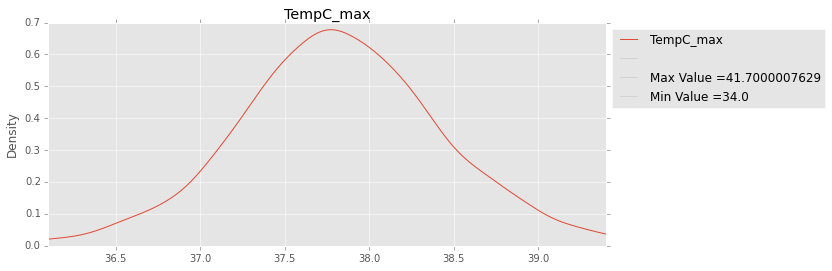

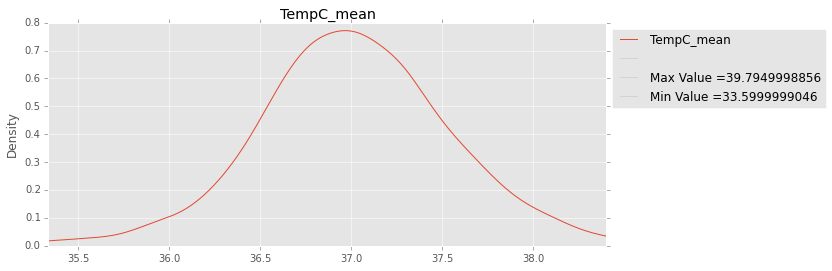

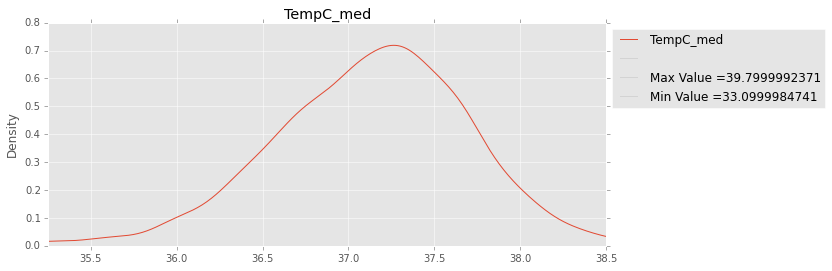

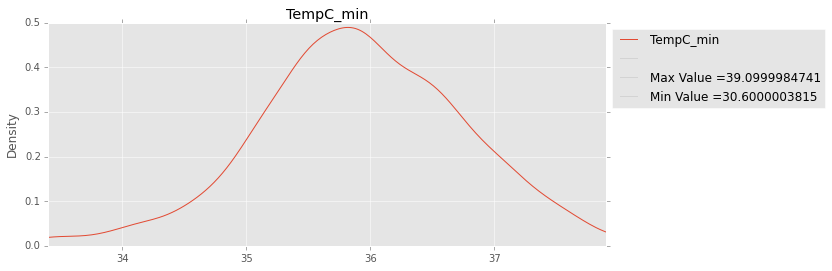

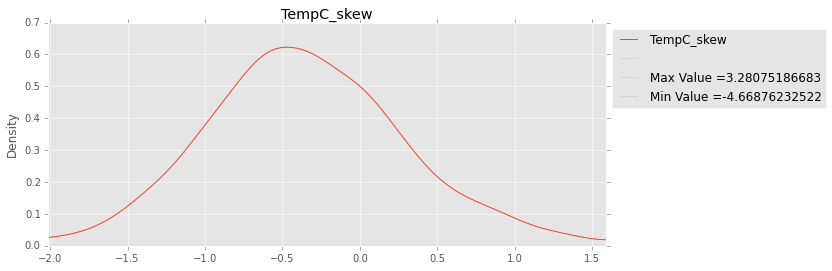

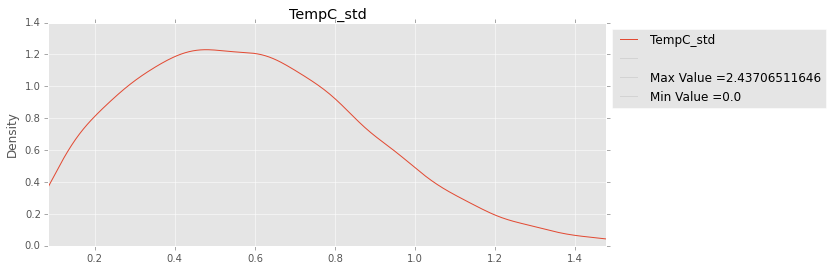

In [298]:
for col in cont_dict[key].columns[2:]:
    plt.subplots(figsize=(10,4))
    cont_dict[key][col].plot.kde()
    xmin = np.percentile(cont_dict[key][col], 1)
    xmax = np.percentile(cont_dict[key][col], 99)
    plt.plot([], label=' ',color='lightgray')
    plt.plot([], label='Max Value ={}'.format(cont_dict[key][col].max()),
             color='lightgray')
    plt.plot([], label='Min Value ={}'.format(cont_dict[key][col].min()),
             color='lightgray')

    plt.xlim(xmin, xmax)
    plt.title(col)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize=12)

#cont_dict['BP'].shape

### USING NUMBERS OF NAN TO GET CLUE ABOUT WHICH VARIABLES ARE BLOCKED TOGETHER

## FEATURE SELECTION FOR CONTINUOUS/FLOAT64 DATA

In [299]:
cont_dict.keys()

['HR',
 'TCalc',
 'O2Sat',
 'BP',
 'pH',
 'Stay',
 'O2',
 'GCST',
 'RR',
 'LAC',
 'labpH',
 'TC']

In [300]:
cont_feature_scores = pd.DataFrame()

for key in cont_dict.keys():

    X_cont = cont_dict[key].drop(['hospital_expire_flag', 'icustay_id'], axis = 1)
    y_cont = cont_dict[key]['hospital_expire_flag']
    below_zeros = list(X_cont.columns[X_cont.min() < 0])
    # SelectKBest can't deal with negative numbers so we shift any variables with negative values
    # up so that the most negative values = 0
    for col in below_zeros:
        col_min = X_cont[col].min()
        X_cont[col] = X_cont[col].apply(lambda x: x-col_min)
    
    selector = SelectKBest(k='all')
    selector.fit(X_cont, y_cont)
    d = {'pvalues': pd.Series(selector.pvalues_, index = X_cont.columns),
         'scores' : pd.Series(selector.scores_, index = X_cont.columns)
        }
    cont_feature_scores = cont_feature_scores.append(pd.DataFrame(d))

cont_feature_scores.sort_values(['pvalues'], axis = 0, ascending = True, inplace = True)

tops = cont_feature_scores.head(20).transpose().columns
bottoms = cont_feature_scores.tail(20).transpose().columns
display(tops[:5])
display(bottoms[:3])
display(cont_dict.keys())

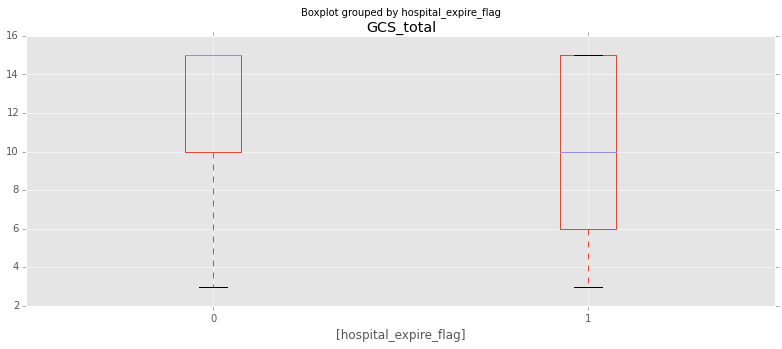

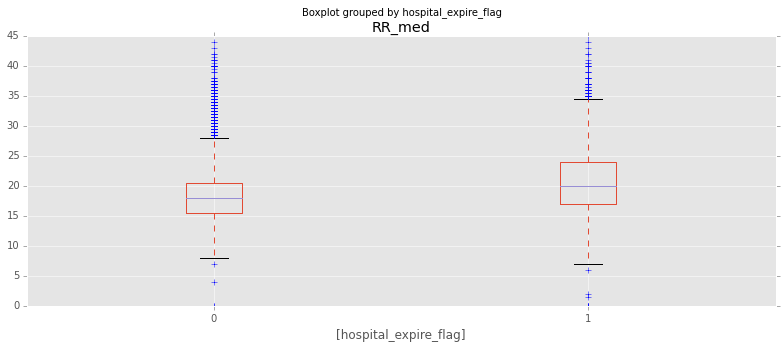

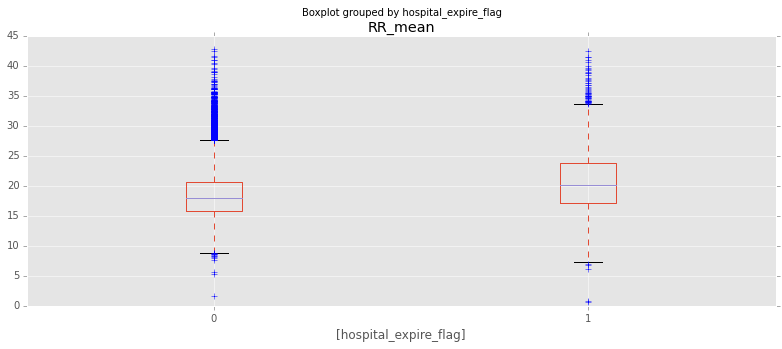

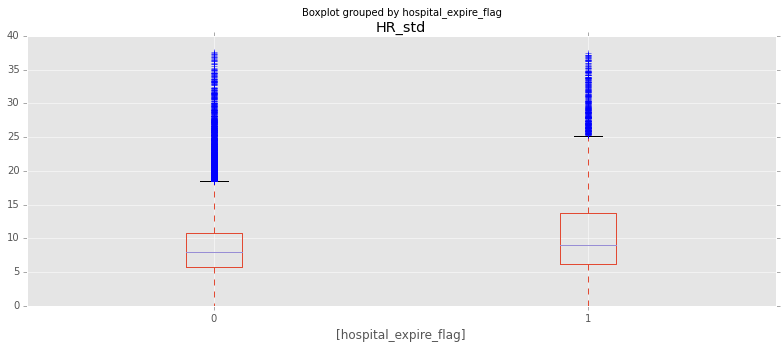

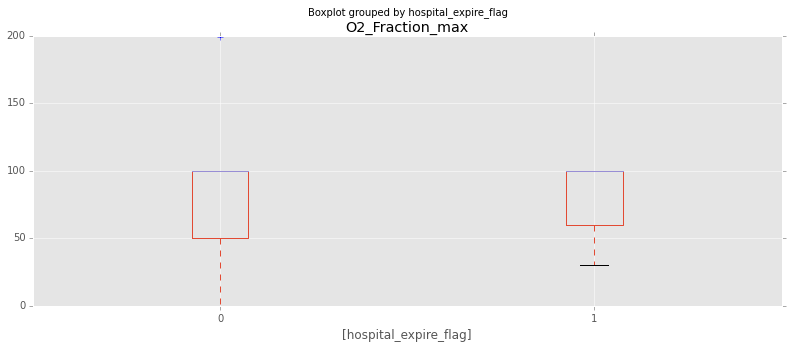

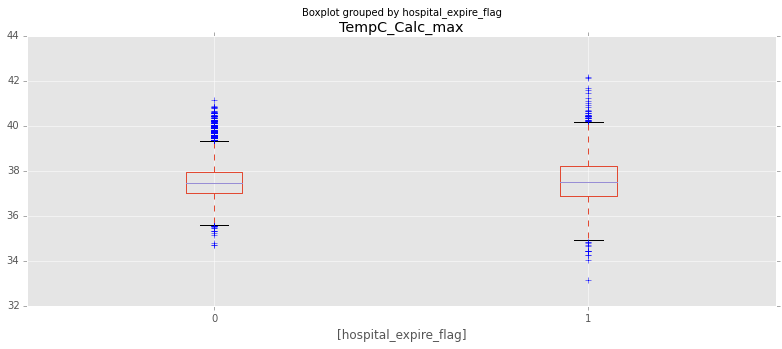

In [306]:
#cont_dict['RR'].plot.scatter(x='hospital_expire_flag', y='RR_med')
#for col in cont_dict['GCST'][''.columns[2:]:
cont_dict['GCST'][['hospital_expire_flag','GCS_total']].dropna().boxplot(by='hospital_expire_flag', figsize = (13,5))
cont_dict['RR'][['hospital_expire_flag','RR_med']].dropna().boxplot(by='hospital_expire_flag', figsize = (13,5))
cont_dict['RR'][['hospital_expire_flag','RR_mean']].dropna().boxplot(by='hospital_expire_flag', figsize = (13,5))
cont_dict['HR'][['hospital_expire_flag','HR_std']].dropna().boxplot(by='hospital_expire_flag', figsize = (13,5))
cont_dict['O2'][['hospital_expire_flag','O2_Fraction_max']].dropna().boxplot(by='hospital_expire_flag', figsize = (13,5))
cont_dict['TCalc'][['hospital_expire_flag','TempC_Calc_max']].dropna().boxplot(by='hospital_expire_flag', figsize = (13,5))



#data[['mort_icu', l.lower()+'_1st']].dropna().boxplot(by='mort_icu', figsize = (13,5))

In [307]:
for col in cat_data.columns:
    print "{} has  {} NaN values".format(col, cat_data[col].isnull().sum())

icustay_id has  0 NaN values
hospital_expire_flag has  0 NaN values
Cap_refill has  54204 NaN values
GCS_Eye has  36828 NaN values
GCS_Motor has  36841 NaN values
GCS_Verbal has  36838 NaN values
charttimelab has  14075 NaN values
flag has  47683 NaN values
gender has  0 NaN values


## CREATING BLOCK OF CATEGORICAL DATA FOR FEATURE SELECTION
### Cap refill and gender are not included in this block and should be evaluated separately

In [323]:
cols = [x for x in cat_data.columns if ('GCS_' in x)]
cols.insert(0,'icustay_id')
cols.insert(1,'hospital_expire_flag')
cat_data_GCS = cat_data[cols].dropna()
print "GCS  = {}".format(cat_data_GCS.shape[0])

cols = ['icustay_id', 'hospital_expire_flag','gender']
cat_data_gender = cat_data[cols].dropna()
#cols.insert(0, cols.pop(cols.index('icustay_id')))
#cols.insert(1, cols.pop(cols.index('subject_id')))
print "gender = {}".format(cat_data_gender.shape[0])




GCS  = 23280
gender = 60131


In [326]:
cat_data_GCS.columns

Index([u'icustay_id', u'hospital_expire_flag', u'GCS_Eye', u'GCS_Motor',
       u'GCS_Verbal'],
      dtype='object')

In [329]:
cols = cat_data_GCS.columns[2:]
cat_data_GCS2 = pd.get_dummies(cat_data_GCS[cols], prefix= cols)
monkey.head()

cols = cat_data_gender.columns[2:]
cat_data_gender2 = pd.get_dummies(cat_data_gender[cols], prefix= cols)



In [331]:
cat_data_GCS2.head()

,GCS_Eye_None,GCS_Eye_Spontaneously,GCS_Eye_To Pain,GCS_Eye_To Speech,GCS_Motor_Abnormal Flexion,GCS_Motor_Abnormal extension,GCS_Motor_Flex-withdraws,GCS_Motor_Localizes Pain,GCS_Motor_No response,GCS_Motor_Obeys Commands,GCS_Verbal_Confused,GCS_Verbal_Inappropriate Words,GCS_Verbal_Incomprehensible sounds,GCS_Verbal_No Response,GCS_Verbal_No Response-ETT,GCS_Verbal_Oriented
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [335]:
cat_dict = {'GCS': [cat_data_GCS, cat_data_GCS2], 
            'Gend': [cat_data_gender, cat_data_gender2] 
            }

cat_feature_scores = pd.DataFrame()

for key in cat_dict.keys():

    X_cat = cat_dict[key][1]
    y_cat = cat_dict[key][0]['hospital_expire_flag']
   
    # SelectKBest can't deal with negative numbers so we shift any variables with negative values
    # up so that the most negative values = 0
   
    selector = SelectKBest(score_func = chi2, k='all')
    selector.fit(X_cat, y_cat)
    d = {'pvalues': pd.Series(selector.pvalues_, index = X_cat.columns),
         'scores' : pd.Series(selector.scores_, index = X_cat.columns)
        }
    cat_feature_scores = cat_feature_scores.append(pd.DataFrame(d))

cat_feature_scores.sort_values(['pvalues'], axis = 0, ascending = True, inplace = True)

tops = cat_feature_scores.head().transpose().columns
bottoms = cat_feature_scores.tail().transpose().columns
display(tops)
display(bottoms)
display(cat_dict.keys())

Index([u'GCS_Eye_None', u'GCS_Motor_No response',
       u'GCS_Verbal_No Response-ETT', u'GCS_Verbal_Oriented',
       u'GCS_Motor_Flex-withdraws'],
      dtype='object')

Index([u'GCS_Verbal_Confused', u'gender_F', u'GCS_Verbal_Inappropriate Words',
       u'GCS_Eye_To Speech', u'gender_M'],
      dtype='object')

['GCS', 'Gend']

In [336]:
cat_feature_scores

,pvalues,scores
GCS_Eye_None,5.232463e-253,1154.293737
GCS_Motor_No response,8.864588e-134,605.867145
GCS_Verbal_No Response-ETT,8.252634e-107,481.898700
GCS_Verbal_Oriented,2.480360e-87,392.404059
GCS_Motor_Flex-withdraws,2.063374e-75,337.659578
GCS_Motor_Abnormal Flexion,4.555559e-73,326.897426
GCS_Motor_Obeys Commands,9.110050e-69,307.152600
GCS_Eye_Spontaneously,1.455077e-60,269.504572
GCS_Motor_Abnormal extension,4.793173e-43,189.183199
GCS_Verbal_No Response,7.098710e-36,156.350027
